In [56]:
import datetime
import numpy as np
import pandas as pd

import src.backtest.operation as operation
import src.backtest.simulation as simulation
import src.models as models

import importlib

In [3]:
importlib.reload(models)
data_loader = models.DataLoader("data/MavenProject.mat")

specific_returns = data_loader.load_df(models.Field.resRet2)
nominal_returns = data_loader.load_df(models.Field.returns)

In [70]:
gics_6 = data_loader.load_df(models.Field.ind3)

style_fields = [models.Field.bB2P, models.Field.bBetaNL, 
                models.Field.bDivYld, models.Field.bErnYld,
                models.Field.bLev, models.Field.bLiquidity, 
                models.Field.bMomentum, models.Field.bResVol,
                models.Field.bSize, models.Field.bSizeNL]

styles = [data_loader.load_df(style) for style in style_fields]

In [107]:
importlib.reload(operation)
pca_residual = operation.ts_pca_residual(504, 3, nominal_returns)

d:\Vanerzen\Development\InterviewKit\Maven_coding_test\src\backtest\operation.py:59: RuntimeWarning: Mean of empty slice
  window, lambda paras, xs: np.nanmean(xs[0], axis=0), [], [df])
d:\Vanerzen\Development\InterviewKit\Maven_coding_test\src\backtest\operation.py:59: RuntimeWarning: Mean of empty slice
  window, lambda paras, xs: np.nanmean(xs[0], axis=0), [], [df])


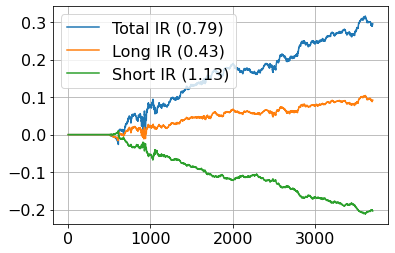

<Figure size 432x288 with 0 Axes>

In [128]:
importlib.reload(operation)
importlib.reload(simulation)

mean_reversal = operation.ts_mean(21, specific_returns)
mean_reversal_rk = operation.cs_group_rank(gics_6, mean_reversal) - 0.5

pca_mean_reversal = operation.ts_mean(63, pca_residual)
pca_mean_reversal_rk = operation.cs_group_rank(gics_6, pca_mean_reversal) - 0.5

combined = -(mean_reversal_rk + pca_mean_reversal_rk)

sim = simulation.Simulation(combined, nominal_returns)
sim.simulate_pnl()

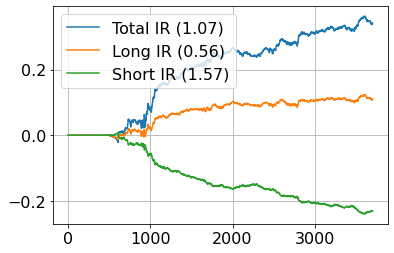

<Figure size 432x288 with 0 Axes>

In [127]:
importlib.reload(operation)
combined_nt = operation.cs_neutralize(True, combined, *styles)
sim = simulation.Simulation(combined_nt, nominal_returns)
sim.simulate_pnl()


C:\Users\Vaner\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Vaner\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


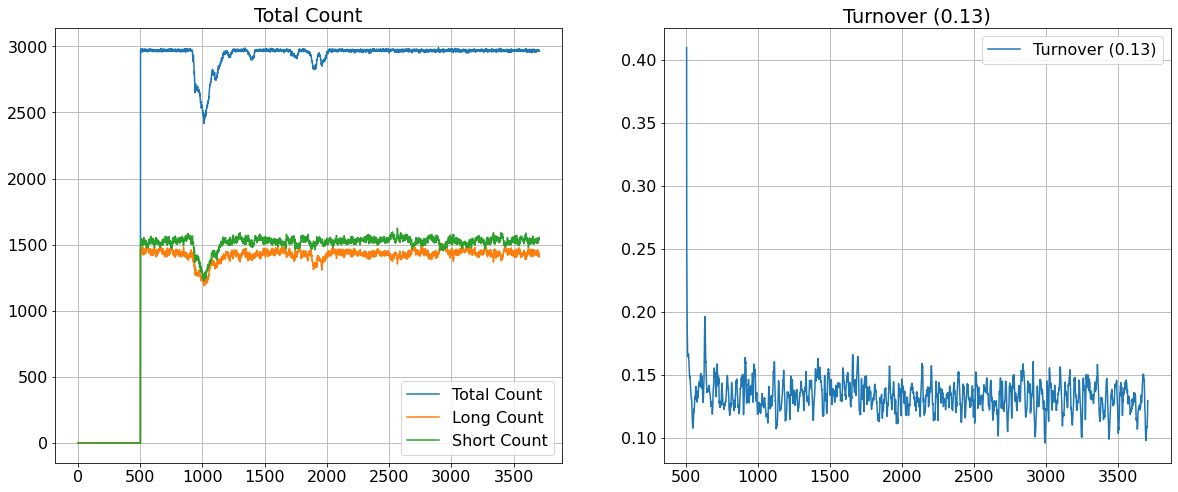

<Figure size 432x288 with 0 Axes>

In [133]:
importlib.reload(operation)
sim.simulate_property()

In [125]:

corr = combined_nt.corrwith(operation.ts_mean(21, nominal_returns).shift(-23), axis=1, method='spearman')

d:\Vanerzen\Development\InterviewKit\Maven_coding_test\src\backtest\operation.py:59: RuntimeWarning: Mean of empty slice
  window, lambda paras, xs: np.nanmean(xs[0], axis=0), [], [df])
